In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [24]:
# Try using a different encoding to load the data
cvi_africa = pd.read_csv('/Users/user/Downloads/Africa_CCVI_subnational_zenodo.csv', encoding='ISO-8859-1')

# Preview the structure
cvi_africa.head()

,GID_0,NAME_0,GID_1,NAME_1,Population,Th1_within,Th2_within,Th3_within,Th4_within,Th5_within,...,Th7_within,CCVI_within,Th1_across,Th2_across,Th3_across,Th4_across,Th5_across,Th6_across,Th7_across,CCVI_across
0,AGO,Angola,AGO.1_1,Bengo,521000,0.294118,0.647059,0.235294,0.058824,0.941176,...,0.352941,0.176471,0.594495,0.231193,0.407339,0.313761,0.996330,0.231193,0.275229,0.262385
1,AGO,Angola,AGO.10_1,Huíla,3206000,0.705882,0.764706,0.588235,0.470588,0.647059,...,0.823529,0.941176,0.781651,0.256881,0.601835,0.480734,0.965138,0.530275,0.568807,0.853211
2,AGO,Angola,AGO.11_1,Luanda,16473000,0.000000,1.000000,0.058824,1.000000,0.176471,...,0.647059,0.823529,0.093578,0.994495,0.115596,0.796330,0.838532,0.834862,0.405505,0.800000
3,AGO,Angola,AGO.12_1,Lunda Norte,884000,0.823529,0.176471,0.764706,0.941176,1.000000,...,0.000000,0.882353,0.836697,0.051376,0.666055,0.644037,0.998165,0.904587,0.047706,0.833028
4,AGO,Angola,AGO.13_1,Lunda Sul,511000,0.647059,0.117647,0.823529,0.705882,0.117647,...,0.176471,0.294118,0.737615,0.049541,0.684404,0.588991,0.757798,0.515596,0.124771,0.466055


In [28]:
# Filter for Nigeria
cvi_nigeria = cvi_africa[cvi_africa['NAME_0'] == 'Nigeria'].copy()

# Rename columns for clarity (21 columns)
cvi_nigeria.columns = [
    'GID_0', 'Country', 'GID_1', 'State', 'Population', 
    'Epidemiological_Within', 'Socioeconomic_Within', 'Household_Within', 
    'Healthcare_System_Within', 'HighRisk_Environments_Within', 'Transportation_Within', 
    'Other_Theme_Within', 'CVI_Nigeria', 
    'Epidemiological_Across', 'Socioeconomic_Across', 'Household_Across', 
    'Healthcare_System_Across', 'HighRisk_Environments_Across', 'Transportation_Across', 
    'Other_Theme_Across', 'CVI_Africa'
]

# Preview the data
cvi_nigeria.head()

,GID_0,Country,GID_1,State,Population,Epidemiological_Within,Socioeconomic_Within,Household_Within,Healthcare_System_Within,HighRisk_Environments_Within,...,Other_Theme_Within,CVI_Nigeria,Epidemiological_Across,Socioeconomic_Across,Household_Across,Healthcare_System_Across,HighRisk_Environments_Across,Transportation_Across,Other_Theme_Across,CVI_Africa
339,NGA,Nigeria,NGA.1_1,Abia,4190000,0.166667,0.861111,0.000000,0.750000,0.138889,...,0.916667,0.111111,0.034862,0.902752,0.012844,0.078899,0.434862,0.212844,0.702752,0.045872
340,NGA,Nigeria,NGA.10_1,Delta,6303000,0.500000,0.611111,0.444444,0.805556,0.777778,...,0.583333,0.416667,0.255046,0.812844,0.185321,0.089908,0.809174,0.255046,0.357798,0.144954
341,NGA,Nigeria,NGA.11_1,Ebonyi,3192000,0.305556,0.694444,0.583333,0.055556,0.333333,...,1.000000,0.694444,0.084404,0.851376,0.227523,0.003670,0.611009,0.634862,0.853211,0.361468
342,NGA,Nigeria,NGA.12_1,Edo,4705000,0.416667,0.527778,0.333333,0.833333,0.055556,...,0.861111,0.027778,0.177982,0.754128,0.119266,0.091743,0.388991,0.174312,0.528440,0.029358
343,NGA,Nigeria,NGA.13_1,Ekiti,3593000,0.083333,0.777778,0.527778,0.305556,0.194444,...,0.750000,0.333333,0.018349,0.891743,0.196330,0.020183,0.555963,0.539450,0.475229,0.119266


In [30]:
cvi_nigeria.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37 entries, 339 to 375
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GID_0                         37 non-null     object 
 1   Country                       37 non-null     object 
 2   GID_1                         37 non-null     object 
 3   State                         37 non-null     object 
 4   Population                    37 non-null     int64  
 5   Epidemiological_Within        37 non-null     float64
 6   Socioeconomic_Within          37 non-null     float64
 7   Household_Within              37 non-null     float64
 8   Healthcare_System_Within      37 non-null     float64
 9   HighRisk_Environments_Within  37 non-null     float64
 10  Transportation_Within         37 non-null     float64
 11  Other_Theme_Within            37 non-null     float64
 12  CVI_Nigeria                   37 non-null     float64
 13  Epidemiol

In [32]:
cvi_nigeria.describe()

,Population,Epidemiological_Within,Socioeconomic_Within,Household_Within,Healthcare_System_Within,HighRisk_Environments_Within,Transportation_Within,Other_Theme_Within,CVI_Nigeria,Epidemiological_Across,Socioeconomic_Across,Household_Across,Healthcare_System_Across,HighRisk_Environments_Across,Transportation_Across,Other_Theme_Across,CVI_Africa
count,3.700000e+01,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,5.843892e+06,0.500000,0.498498,0.500000,0.500000,0.499249,0.500000,0.496997,0.499249,0.386065,0.726407,0.254352,0.056534,0.678998,0.566030,0.307612,0.274585
std,2.622344e+06,0.300677,0.301456,0.300677,0.300677,0.300355,0.300677,0.301017,0.300854,0.348239,0.165209,0.196353,0.064557,0.182867,0.282654,0.232156,0.240487
min,2.606000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011009,0.346789,0.012844,0.000000,0.211009,0.117431,0.000000,0.005505
25%,4.272000e+06,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.067890,0.607339,0.091743,0.016514,0.581651,0.324771,0.088073,0.100917
50%,5.185000e+06,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.255046,0.728440,0.190826,0.036697,0.739450,0.539450,0.286239,0.161468
75%,6.376000e+06,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.704587,0.882569,0.427523,0.078899,0.805505,0.862385,0.475229,0.411009
max,1.472600e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.944954,0.992661,0.739450,0.344954,0.959633,0.992661,0.853211,0.856881


In [34]:
cvi_nigeria.shape

(37, 21)

In [36]:
cvi_nigeria.isnull().sum()

GID_0                           0
Country                         0
GID_1                           0
State                           0
Population                      0
Epidemiological_Within          0
Socioeconomic_Within            0
Household_Within                0
Healthcare_System_Within        0
HighRisk_Environments_Within    0
Transportation_Within           0
Other_Theme_Within              0
CVI_Nigeria                     0
Epidemiological_Across          0
Socioeconomic_Across            0
Household_Across                0
Healthcare_System_Across        0
HighRisk_Environments_Across    0
Transportation_Across           0
Other_Theme_Across              0
CVI_Africa                      0
dtype: int64

In [40]:
#This filters states with a CVI above 0.5 (indicating higher vulnerability).
high_vulnerability = cvi_nigeria[cvi_nigeria['CVI_Nigeria'] > 0.5]
print(high_vulnerability[['State', 'CVI_Nigeria']])

         State  CVI_Nigeria
341     Ebonyi     0.694444
346      Gombe     0.916667
348     Jigawa     0.944444
349     Kaduna     0.666667
350    Adamawa     0.833333
351       Kano     0.527778
352    Katsina     0.750000
353      Kebbi     0.722222
358      Niger     0.555556
361  Akwa Ibom     0.638889
364    Plateau     0.583333
366     Sokoto     0.861111
367     Taraba     0.888889
368       Yobe     1.000000
369    Zamfara     0.972222
371     Bauchi     0.805556
373      Benue     0.611111
374      Borno     0.777778


<Axes: title={'center': 'CVI by State in Nigeria'}, xlabel='State'>

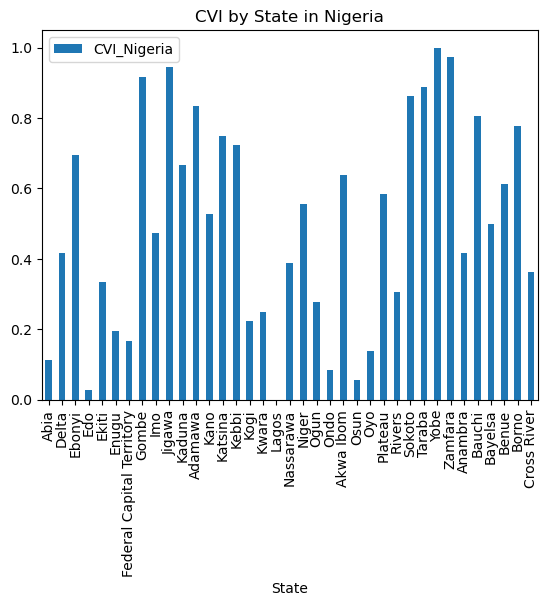

In [44]:
cvi_nigeria.plot(kind='bar', x='State', y='CVI_Nigeria', title='CVI by State in Nigeria')

<Axes: title={'center': 'CVI Trend Across Nigerian States'}, xlabel='State'>

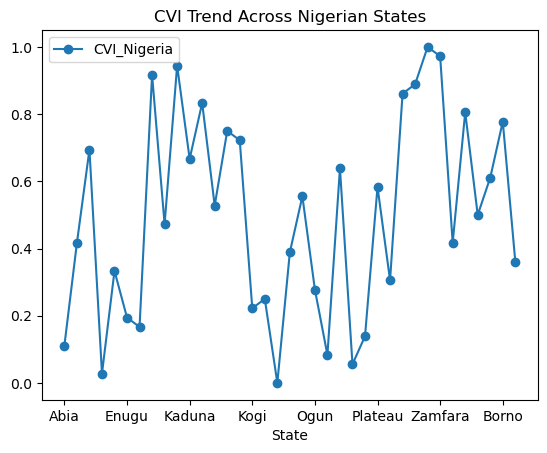

In [46]:
cvi_nigeria.plot(kind='line', x='State', y='CVI_Nigeria', title='CVI Trend Across Nigerian States', marker='o')

<Axes: title={'center': 'Population vs. CVI in Nigeria'}, xlabel='Population', ylabel='CVI_Nigeria'>

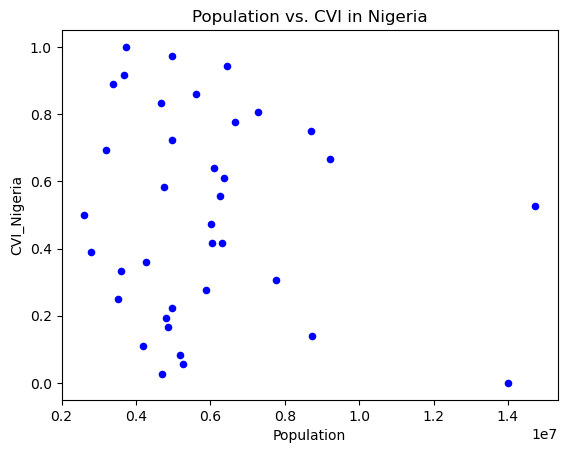

In [48]:
cvi_nigeria.plot(kind='scatter', x='Population', y='CVI_Nigeria', title='Population vs. CVI in Nigeria', color='blue')

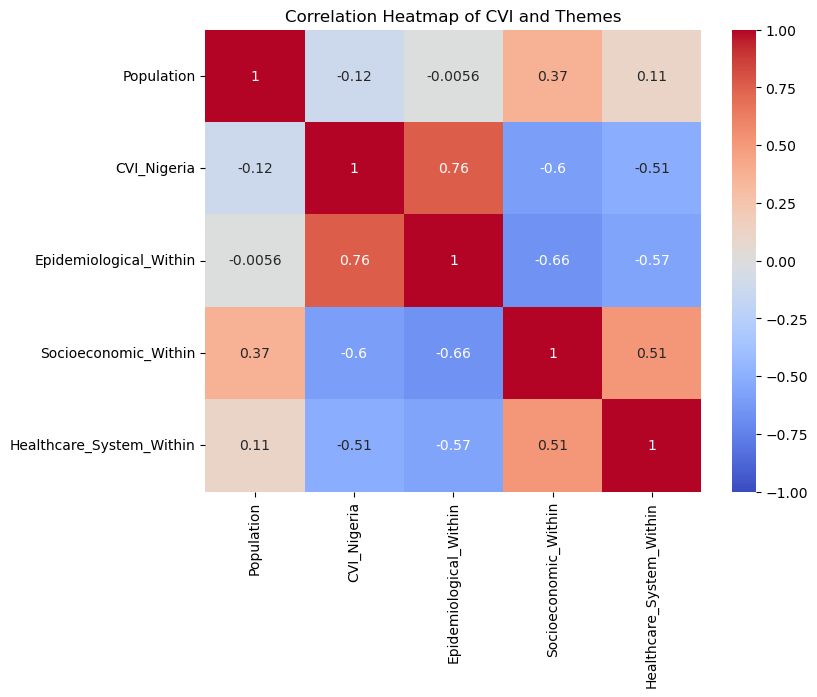

In [54]:
# Select numerical columns
numeric_cols = ['Population', 'CVI_Nigeria', 'Epidemiological_Within', 'Socioeconomic_Within', 'Healthcare_System_Within']
correlation_matrix = cvi_nigeria[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of CVI and Themes')
plt.show()